In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from helpers.products import Products
from directed_graph_generators.directed_tree import DirectedTree
from directed_graph_generators.lattice import DirectedLattice
from directed_graph_generators.directed_stochastic_block_model import DirectedStochasticBlockModel

from clustering_algorithms.exponential_clustering import Exponential_Clustering, Exponential_Clustering_no_evecs
from clustering_algorithms.zanetti_clustering import DSBM_Clustering_Zanetti

Exponential Clustering ARI: 1.0
Zanetti Clustering ARI: 1.0


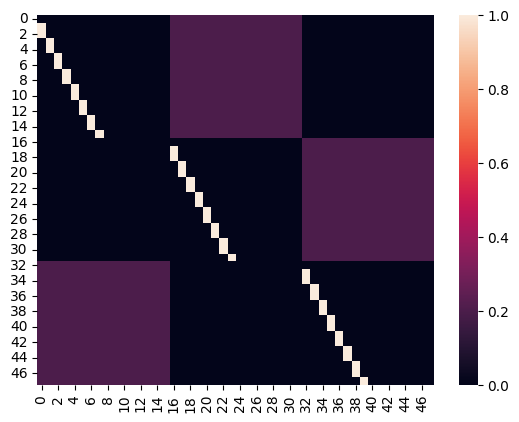

In [2]:
downwards_binary_tree = DirectedTree(16, 2).adjacency_matrix
three_cycle = np.array([[0,1,0],[0,0,1],[1,0,0]])

graph_adj = Products.tensor_product(np.eye(len(three_cycle)),downwards_binary_tree)
graph_adj+= + Products.tensor_product(three_cycle, 0.2*np.ones(shape = (len(downwards_binary_tree), len(downwards_binary_tree))))
true_clusters = np.array([len(downwards_binary_tree)*[i] for i in range(len(three_cycle))]).flatten()
sns.heatmap(graph_adj)
# trying Zanetti clustering
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(graph_adj,K=3,t=10)
ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
# Zanetti Clustering
zc_clusters,_ = DSBM_Clustering_Zanetti(graph_adj,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

Adding some noise...

In [ ]:
downwards_binary_tree = DirectedTree(30, 5).adjacency_matrix
three_cycle = np.array([[0,1,0],[0,0,1],[1,0,0]])

graph_adj = Products.tensor_product(np.eye(len(three_cycle)),downwards_binary_tree)
noisy_3_cycle = DirectedStochasticBlockModel(k=3,N = len(graph_adj), p=0.5, q=0.5,F = np.array([[0,0.8,0.2],[0.2,0,0.8],[0.8,0.2,0]])).adjacency_matrix
# replacing diagonal blocks with 0s and 
 
ones = np.ones(shape = (len(downwards_binary_tree), len(downwards_binary_tree)))
block_three_cycle_of_ones = Products.tensor_product(three_cycle,ones)

noisy_3_cycle = noisy_3_cycle * block_three_cycle_of_ones
graph_adj_complete = graph_adj + noisy_3_cycle
true_clusters = np.array([len(downwards_binary_tree)*[i] for i in range(len(three_cycle))]).flatten()
sns.heatmap(graph_adj_complete)
# trying Zanetti clustering
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(graph_adj_complete,K=3,t=10)
ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
# Zanetti Clustering
zc_clusters,_ = DSBM_Clustering_Zanetti(graph_adj_complete,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

It appears a tree doesn't have enough 'flow' inside them to create an adversarial example.

## Lattice Clusters

Exponential Clustering ARI: 1.0
Zanetti Clustering ARI: 1.0


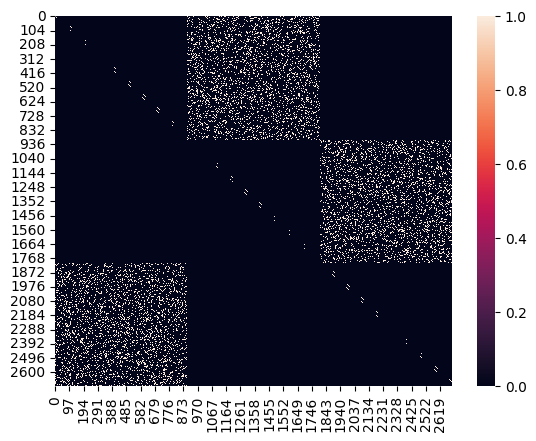

In [3]:
lattice = DirectedLattice(30, 30).adjacency_matrix
three_cycle = np.array([[0,1,0],[0,0,1],[1,0,0]])

graph_adj = Products.tensor_product(np.eye(len(three_cycle)),lattice)
noisy_3_cycle = DirectedStochasticBlockModel(k=3,N = len(graph_adj), p=0.2, q=0.2,F = np.array([[0.5,0.8,0.2],[0.2,0.5,0.8],[0.8,0.2,0.5]])).adjacency_matrix
# replacing diagonal blocks with 0s and 
 
ones = np.ones(shape = (len(lattice), len(lattice)))
block_three_cycle_of_ones = Products.tensor_product(three_cycle,ones)

noisy_3_cycle = noisy_3_cycle * block_three_cycle_of_ones
graph_adj_complete = graph_adj + noisy_3_cycle
true_clusters = np.array([len(lattice)*[i] for i in range(len(three_cycle))]).flatten()
sns.heatmap(graph_adj_complete)
# trying Zanetti clustering
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(graph_adj_complete,K=3,t=10)
ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
# Zanetti Clustering
zc_clusters,_ = DSBM_Clustering_Zanetti(graph_adj_complete,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

<AxesSubplot: >

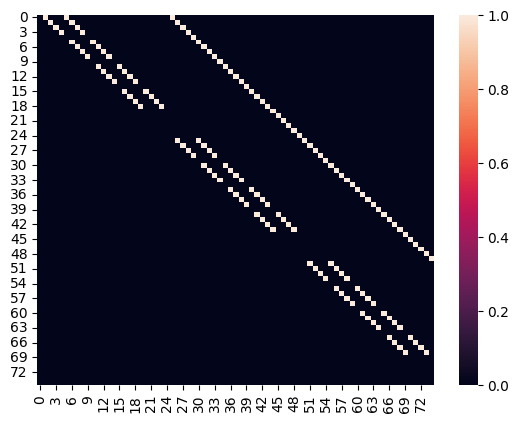

In [4]:
L = DirectedLattice(5,5).adjacency_matrix
path = np.array([[0,1,0],[0,0,1],[0,0,0]])
cart_prod_L_and_path = Products.cartesian_product(path,L)
sns.heatmap(cart_prod_L_and_path)

In [ ]:
# get true clusters of cartesian_prod_L_and_path
true_clusters = [i for i in range(len(path)) for j in range(len(L))]
ARIs = []
for t in range(0,200):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(cart_prod_L_and_path,K=3,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)
    # Zanetti Clustering

pd.Series(ARIs).plot()

In [ ]:
zc_clusters,_ = DSBM_Clustering_Zanetti(cart_prod_L_and_path,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

Reattempting experiment with random lattice

<AxesSubplot: >

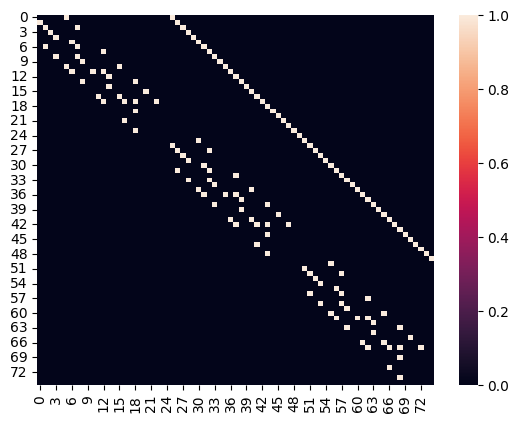

In [5]:
L = DirectedLattice(5,5,directions='random').adjacency_matrix
path = np.array([[0,1,0],[0,0,1],[0,0,0]])
cart_prod_L_and_path = Products.cartesian_product(path,L)
sns.heatmap(cart_prod_L_and_path)

In [6]:
true_clusters = [i for i in range(len(path)) for j in range(len(L))]

In [7]:
zc_clusters,_ = DSBM_Clustering_Zanetti(cart_prod_L_and_path,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

Zanetti Clustering ARI: -0.0003557452863749555


In [ ]:
# get true clusters of cartesian_prod_L_and_path
true_clusters = [i for i in range(len(path)) for j in range(len(L))]
ARIs = []
for t in range(0,200):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(cart_prod_L_and_path,K=3,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)
    

In [ ]:
pd.Series(ARIs).plot()

In [8]:
# Lets try lattices with more noise between them
def directed_lattices_with_binomial_noise_joining(Lattices, K, p = 0.05):
    num_nodes = len(Lattices)*K
    adjacency_matrix = np.zeros(shape = (num_nodes,num_nodes))
    for i in range(K):
        adjacency_matrix[i*len(Lattices):(i+1)*len(Lattices),i*len(Lattices):(i+1)*len(Lattices)] = Lattices

    # add edges between block lattices
    for i in range(K-1):
        adjacency_matrix[i*len(Lattices):(i+1)*len(Lattices),(i+1)*len(Lattices):(i+2)*len(Lattices)] = np.random.binomial(n=1,p=p,size=(len(Lattices),len(Lattices)))

    return adjacency_matrix
    

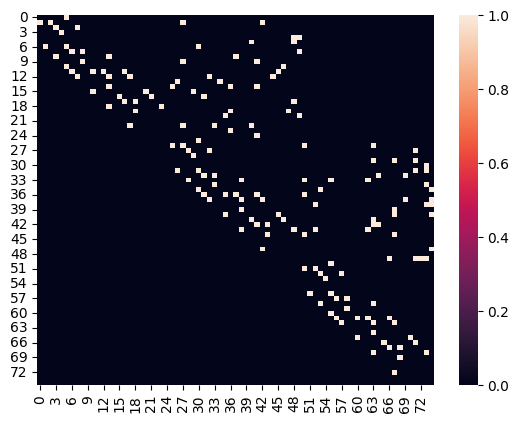

Zanetti Clustering ARI: 0.06403480152256662
Exponential Clustering ARI: 0.07209360602964705


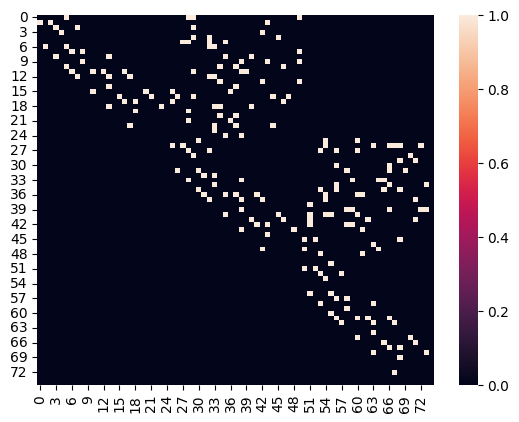

Zanetti Clustering ARI: 0.31364272543487437
Exponential Clustering ARI: 0.3870395422589874


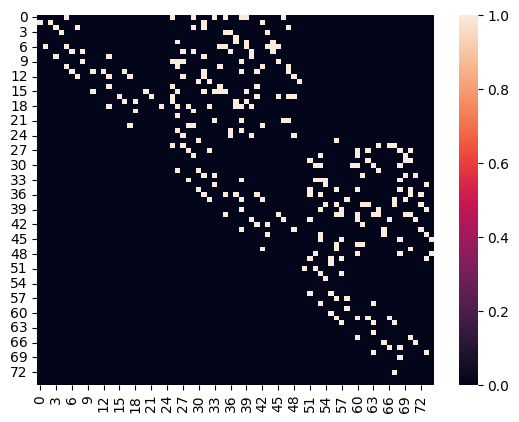

Zanetti Clustering ARI: 0.7706662519716526
Exponential Clustering ARI: 0.7706662519716526


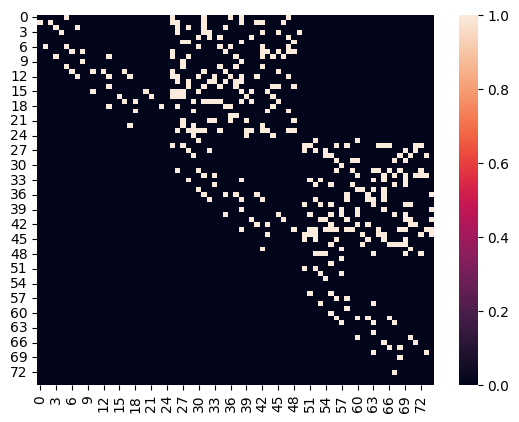

Zanetti Clustering ARI: 0.9597227467620465
Exponential Clustering ARI: 0.9597227467620465


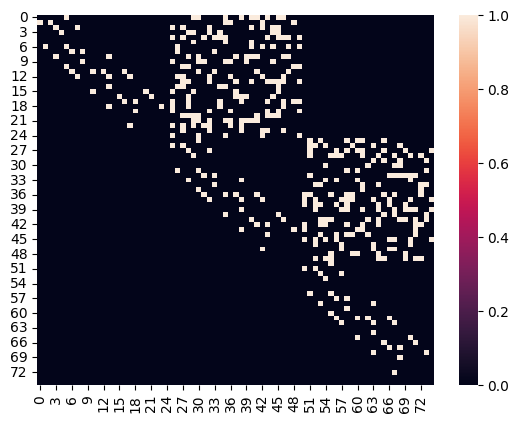

Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


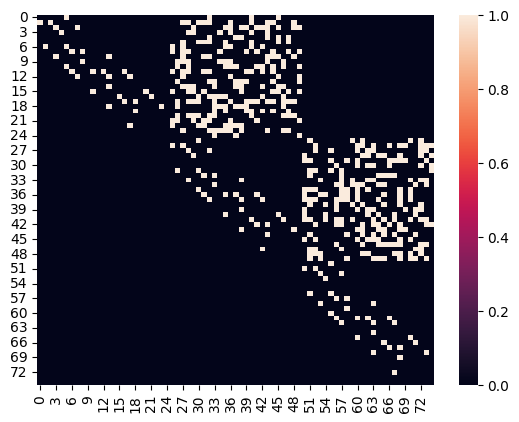

Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


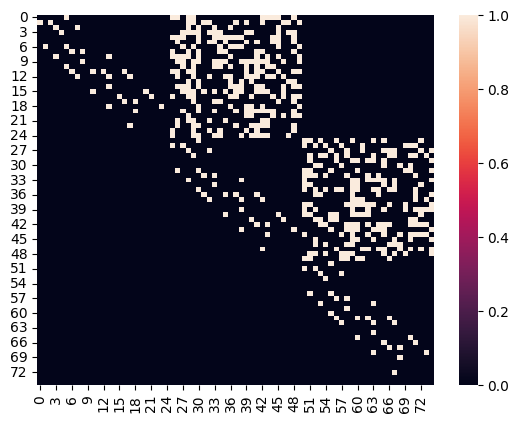

Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


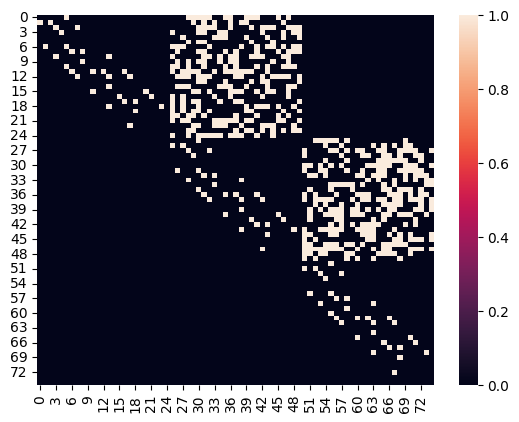

Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


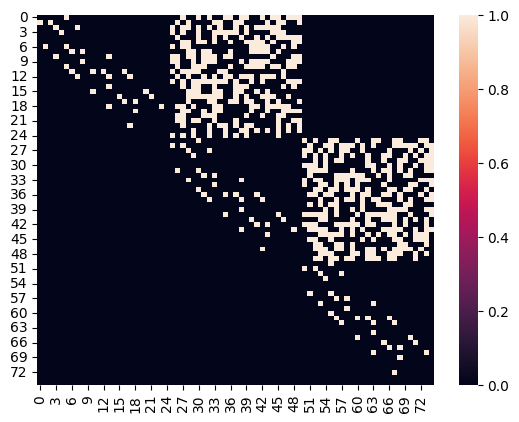

Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


In [17]:
Lattices = DirectedLattice(5,5,directions='random').adjacency_matrix
true_clusters = [j for j in range(3) for i in range(len(Lattices))]

for p in np.arange(0.05,0.5,0.05):
    adjacency_matrix = directed_lattices_with_binomial_noise_joining(Lattices, 3, p = p)
    sns.heatmap(adjacency_matrix)
    plt.show()
    zc_clusters,_ = DSBM_Clustering_Zanetti(adjacency_matrix,K=3,l=1,method='adjacency',normalize=True)
    exp_clusters,_ = Exponential_Clustering_no_evecs(adjacency_matrix,K=3,t=10)
    zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
    exp_ari = adjusted_rand_score(true_clusters,exp_clusters)
    # printing results for standard clustering
    print(f"Zanetti Clustering ARI: {zc_ari}")
    print(f"Exponential Clustering ARI: {exp_ari}")

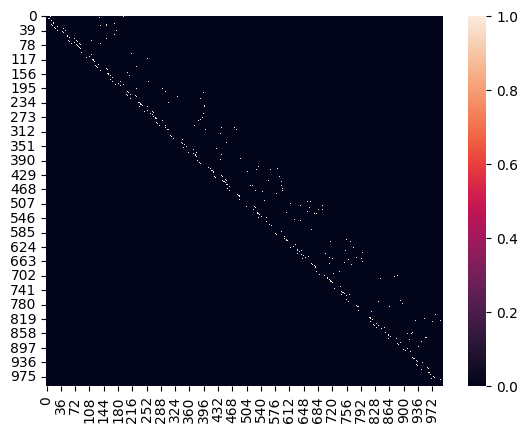

p is 0.01
Zanetti Clustering ARI: 0.00023866702390506784
Exponential Clustering ARI: 0.0005611823309308354


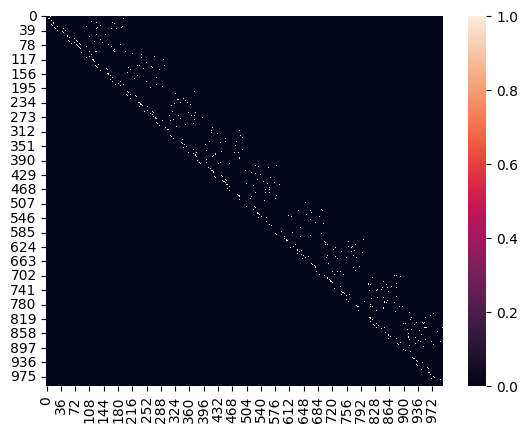

p is 0.02
Zanetti Clustering ARI: 0.14476195282220602
Exponential Clustering ARI: 0.18241381545718965


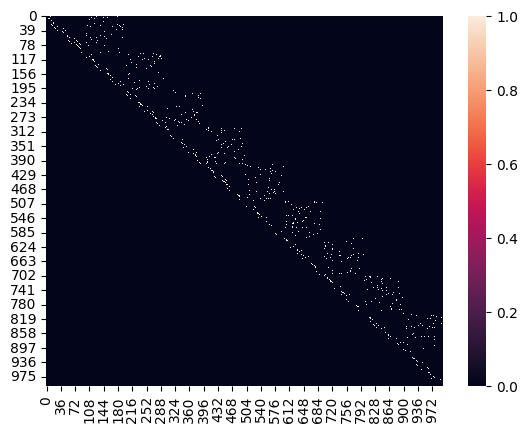

p is 0.03
Zanetti Clustering ARI: 0.6937983442299887
Exponential Clustering ARI: 0.7155007917034857


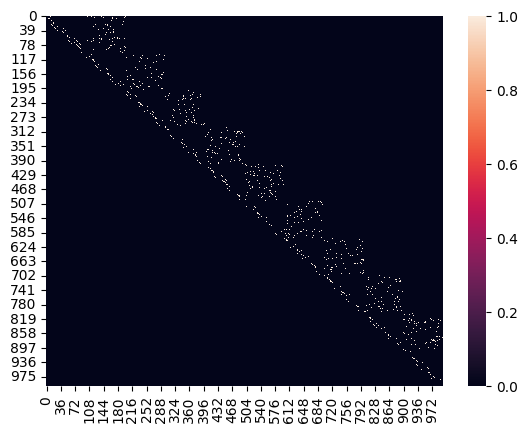

p is 0.04
Zanetti Clustering ARI: 0.894335722050002
Exponential Clustering ARI: 0.9186818766720538


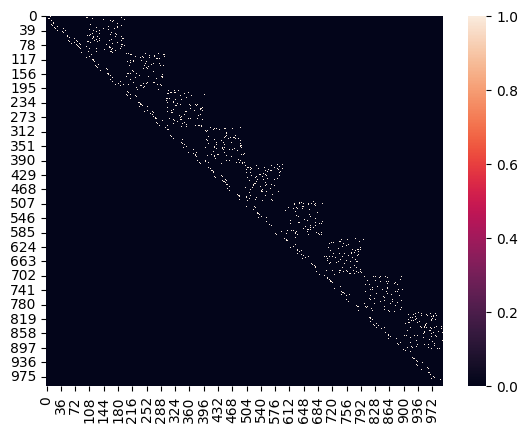

p is 0.05
Zanetti Clustering ARI: 0.9779058746897793
Exponential Clustering ARI: 0.9800883467497814


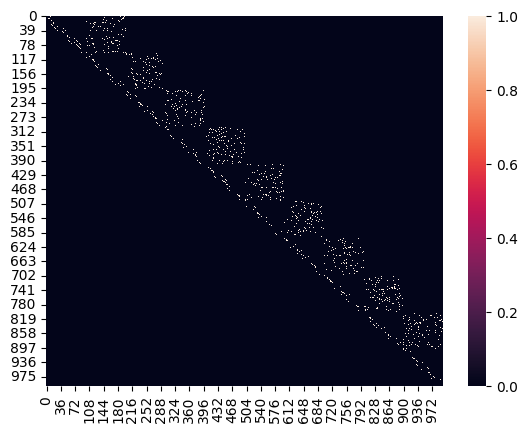

p is 0.060000000000000005
Zanetti Clustering ARI: 0.9844395341757997
Exponential Clustering ARI: 0.9888892872997123


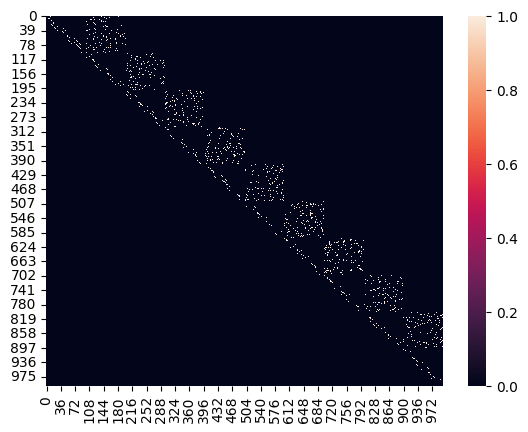

p is 0.06999999999999999
Zanetti Clustering ARI: 0.9977688079369792
Exponential Clustering ARI: 0.9955376559896196


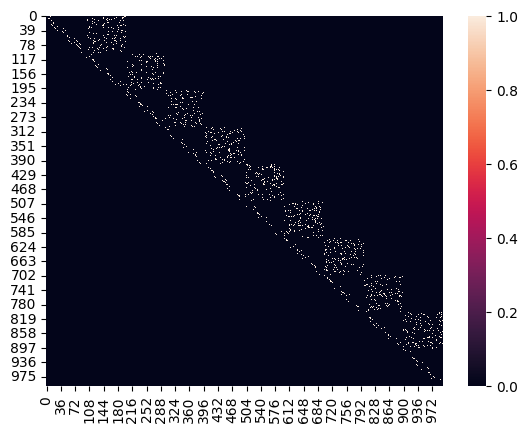

p is 0.08
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


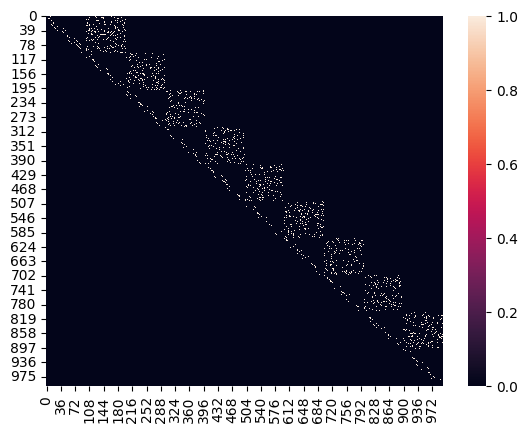

p is 0.09
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


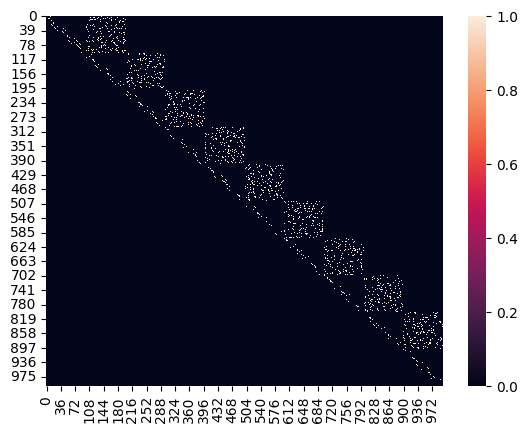

p is 0.09999999999999999
Zanetti Clustering ARI: 0.9977688079369792
Exponential Clustering ARI: 0.9977688079369792


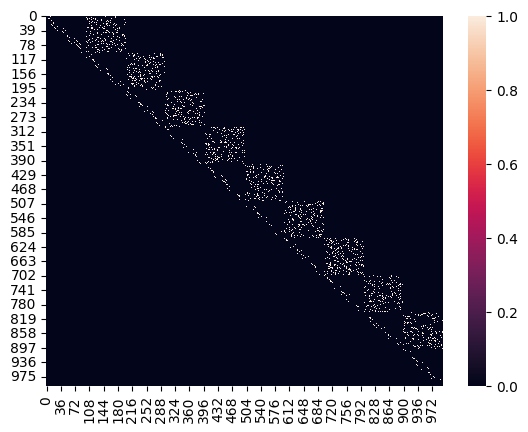

p is 0.11
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 0.9977688079369792


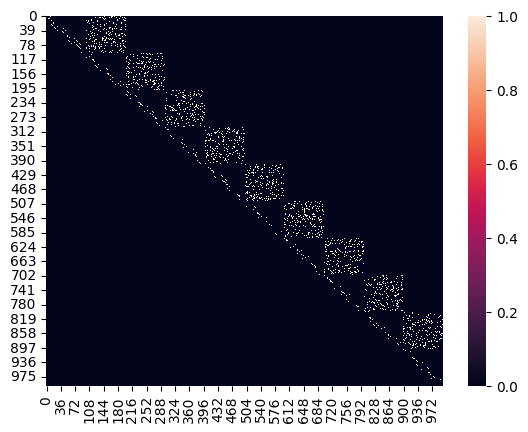

p is 0.12
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


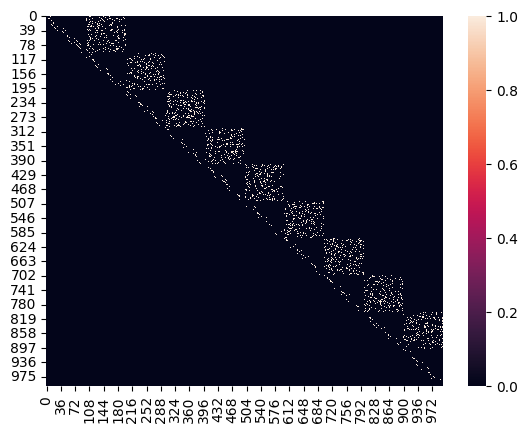

p is 0.13
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


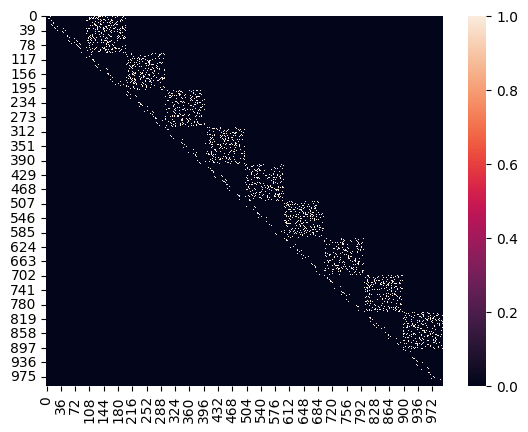

p is 0.14
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


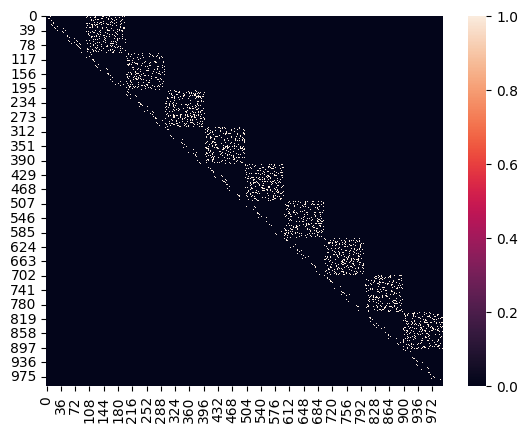

p is 0.15000000000000002
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


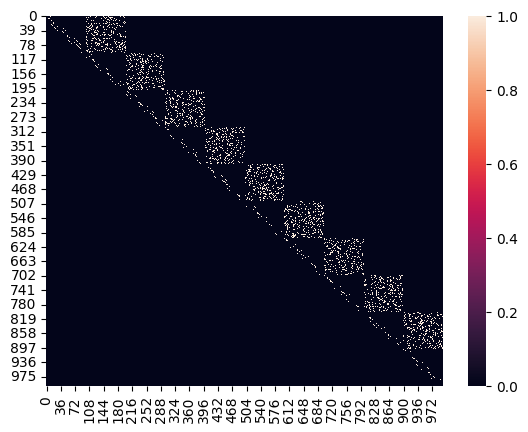

p is 0.16
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


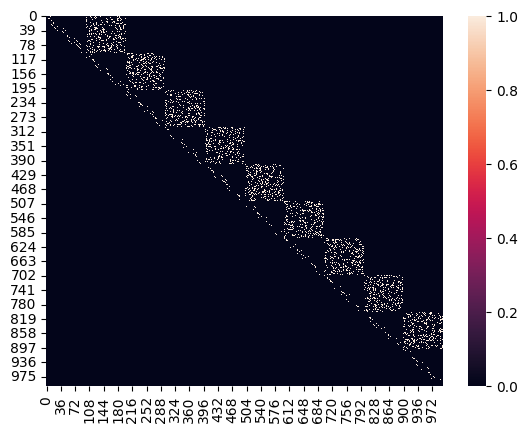

p is 0.17
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


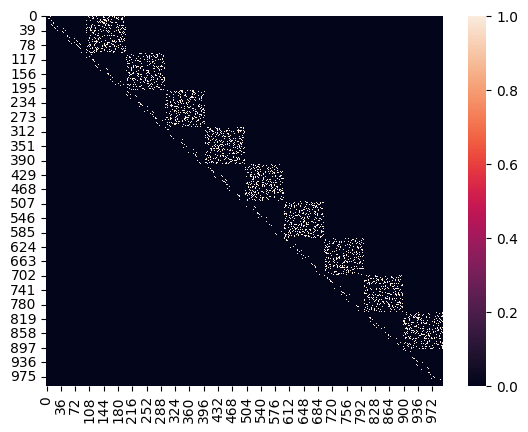

p is 0.18000000000000002
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


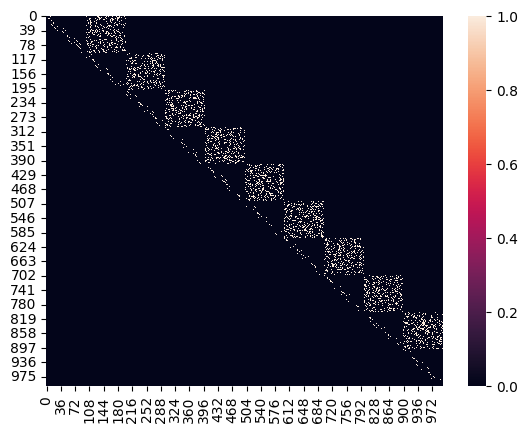

p is 0.19
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


In [27]:
#Repeating experiment with different number of Lattices of a different size
K=10
Lattices = DirectedLattice(10,10,directions='random').adjacency_matrix
true_clusters = [j for j in range(K) for i in range(len(Lattices))]

for p in np.arange(0.01,0.2,0.01):
    adjacency_matrix = directed_lattices_with_binomial_noise_joining(Lattices, K, p = p)
    sns.heatmap(adjacency_matrix)
    plt.show()
    zc_clusters,_ = DSBM_Clustering_Zanetti(adjacency_matrix,K=K,l=int(K/2),method='adjacency',normalize=True)
    exp_clusters,_ = Exponential_Clustering_no_evecs(adjacency_matrix,K=K,t=10)
    zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
    exp_ari = adjusted_rand_score(true_clusters,exp_clusters)
    # printing results for standard clustering
    print(f"p is {p}")
    print(f"Zanetti Clustering ARI: {zc_ari}")
    print(f"Exponential Clustering ARI: {exp_ari}")

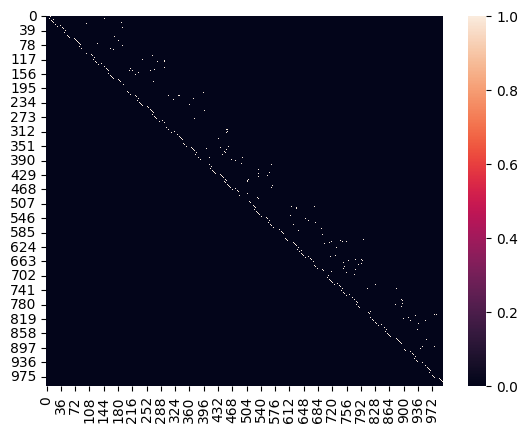

p is 0.01
Zanetti Clustering ARI: 0.0002903485146066542
Exponential Clustering ARI: 0.00028022643699142797


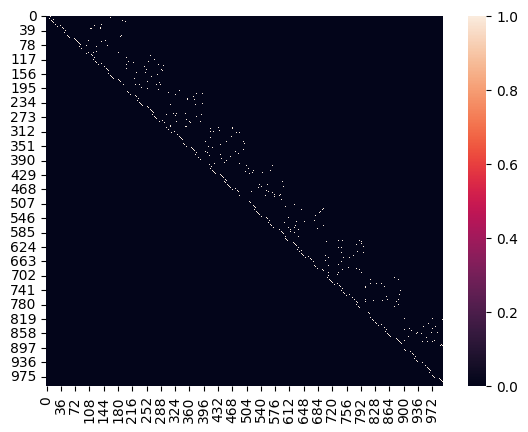

p is 0.02
Zanetti Clustering ARI: 0.013414700608011348
Exponential Clustering ARI: 0.033004050573464755


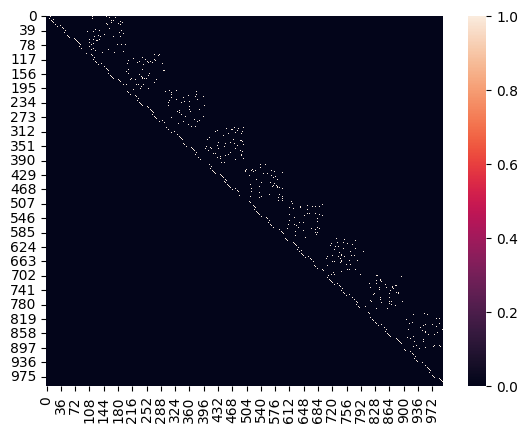

p is 0.03
Zanetti Clustering ARI: 0.16260180781481
Exponential Clustering ARI: 0.29937940781312505


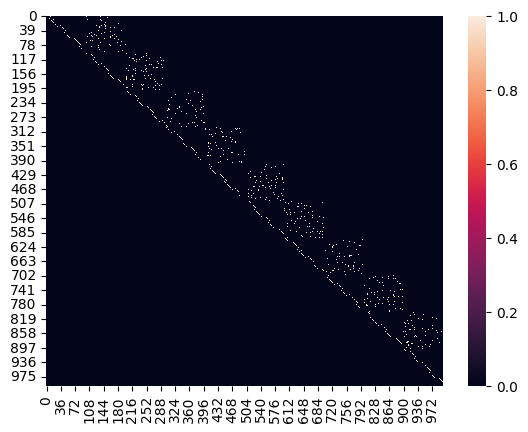

p is 0.04
Zanetti Clustering ARI: 0.7621454374654437
Exponential Clustering ARI: 0.8300597532712183


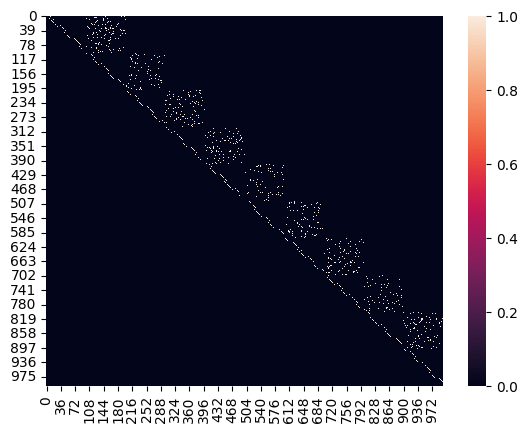

p is 0.05
Zanetti Clustering ARI: 0.9955376559896196
Exponential Clustering ARI: 0.9843620431657902


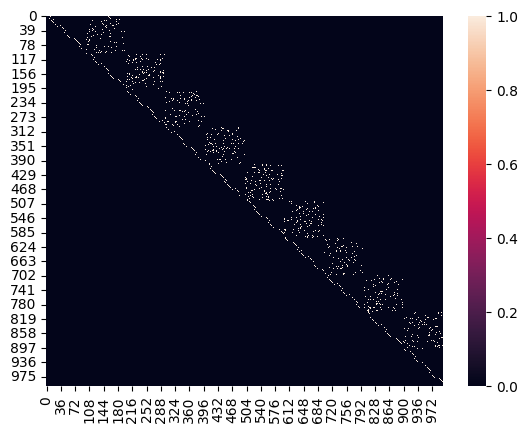

p is 0.060000000000000005
Zanetti Clustering ARI: 0.9977688079369792
Exponential Clustering ARI: 0.9910424009585315


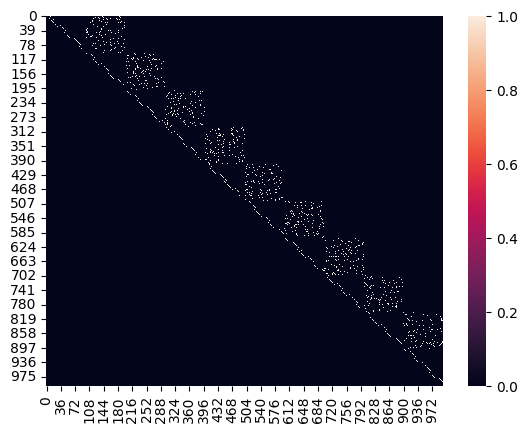

p is 0.06999999999999999
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 0.9955376559896196


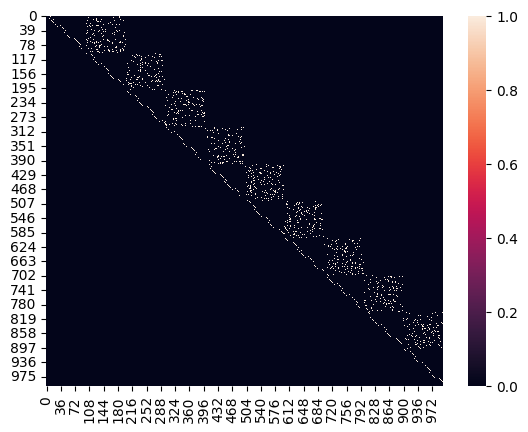

p is 0.08
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 0.9955376559896196


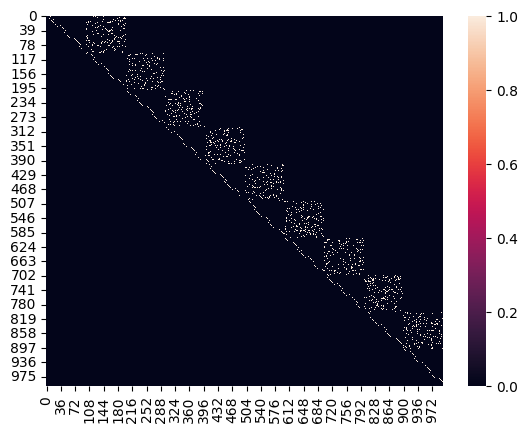

p is 0.09
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


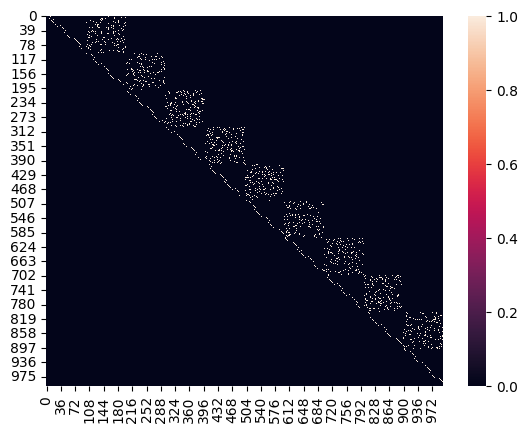

p is 0.09999999999999999
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


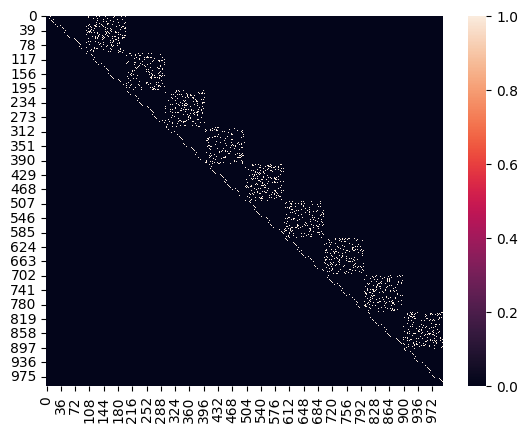

p is 0.11
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


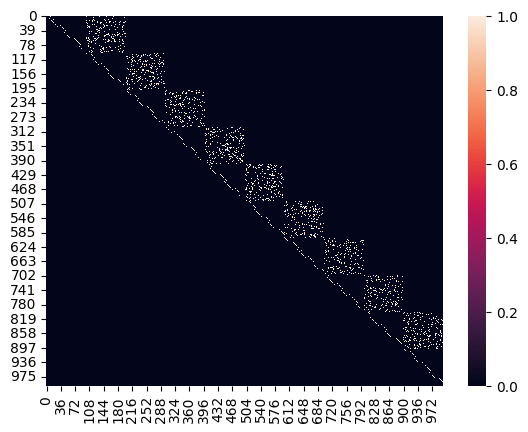

p is 0.12
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


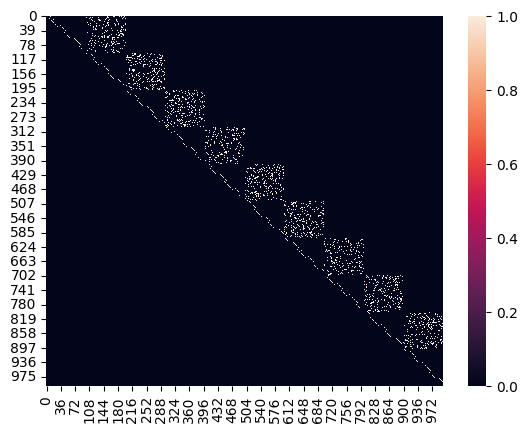

p is 0.13
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


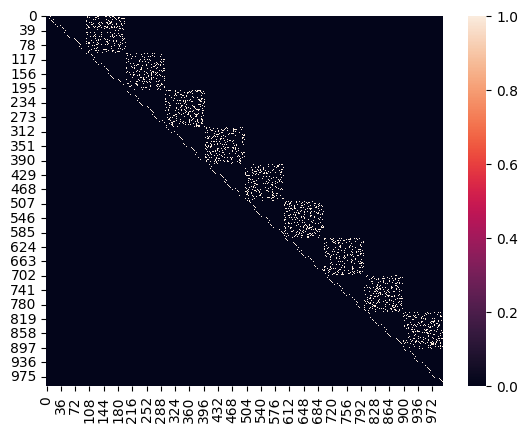

p is 0.14
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


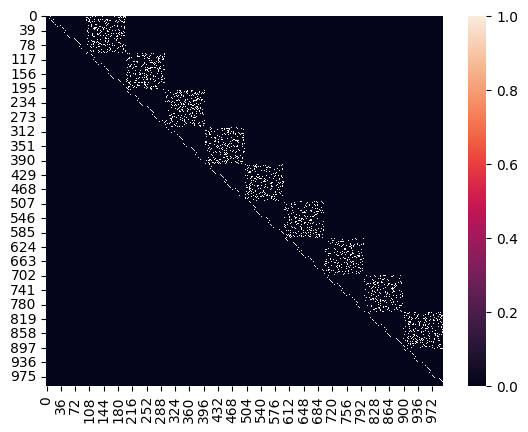

p is 0.15000000000000002
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


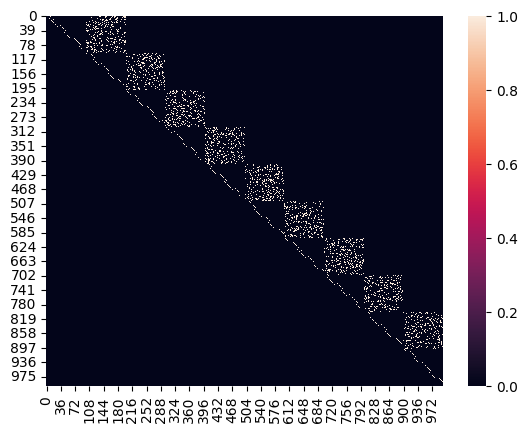

p is 0.16
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


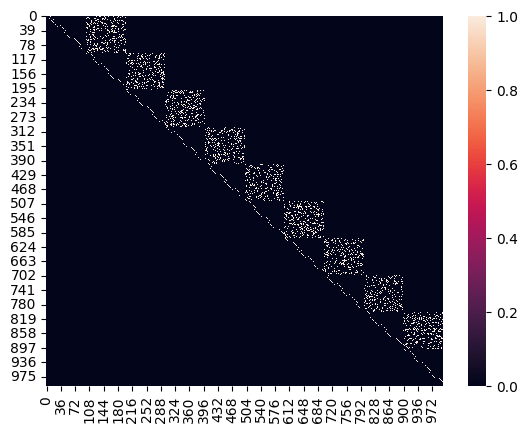

p is 0.17
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


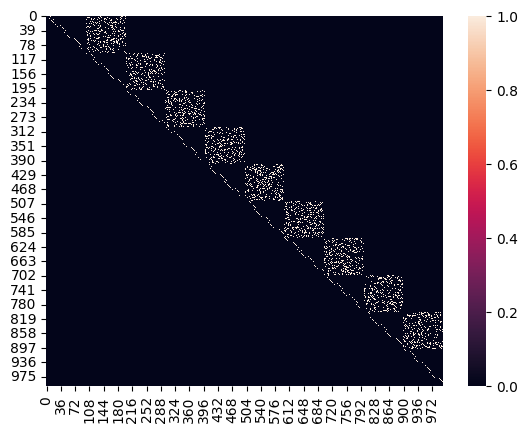

p is 0.18000000000000002
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


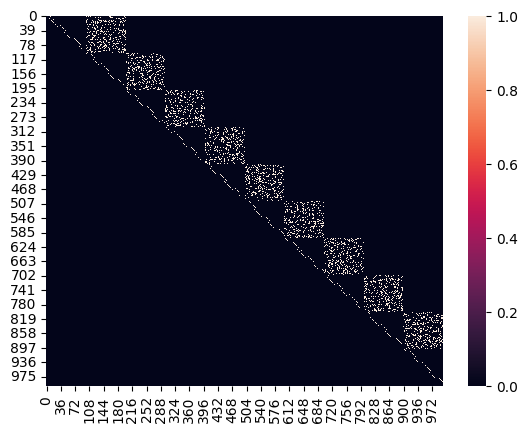

p is 0.19
Zanetti Clustering ARI: 1.0
Exponential Clustering ARI: 1.0


In [28]:
#Repeating again with non-random lattices
K=10
Lattices = DirectedLattice(10,10).adjacency_matrix
true_clusters = [j for j in range(K) for i in range(len(Lattices))]
for p in np.arange(0.01,0.2,0.01):
    adjacency_matrix = directed_lattices_with_binomial_noise_joining(Lattices, K, p = p)
    sns.heatmap(adjacency_matrix)
    plt.show()
    zc_clusters,_ = DSBM_Clustering_Zanetti(adjacency_matrix,K=K,l=int(K/2),method='adjacency',normalize=True)
    exp_clusters,_ = Exponential_Clustering_no_evecs(adjacency_matrix,K=K,t=10)
    zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
    exp_ari = adjusted_rand_score(true_clusters,exp_clusters)
    # printing results for standard clustering
    print(f"p is {p}")
    print(f"Zanetti Clustering ARI: {zc_ari}")
    print(f"Exponential Clustering ARI: {exp_ari}")

# Some crazy stuff converting numerical data points to create adversarial directed graphs


In [ ]:
from scipy.spatial.distance import squareform, pdist
# We know generate a directed graph from 2d cartesian coordinates where the the closer the points are the more likely they are to be connected and where edges are more likely to be directed into the negative y direction
# We then use the exponential clustering algorithm to cluster the graph
# We then use the Zanetti clustering algorithm to cluster the graph
# We then compare the results of the two algorithms
def generate_graph(coordinates: np.ndarray, sigma: float = 1) -> np.ndarray:
    """
    Generates a graph from a set of coordinates where the closer the points are the more likely they are to be connected
    :param coordinates: np.ndarray of shape (n,2) where n is the number of points
    :param sigma: float, the standard deviation of the gaussian distribution used to generate the graph
    :param directed: bool, whether the graph is directed or not
    :return: np.ndarray of shape (n,n) where n is the number of points
    """
    # get the euclidean distance between every pair of points
    dist = squareform(pdist(coordinates))
    # generate a graph from the distance matrix
    graph = np.exp(-dist ** 2 / (2 * sigma ** 2))
    # set the diagonal to 0
    graph = graph - np.diag(np.diag(graph))
    # make edges more likely to be directed downwards in the y direction
    for i in range(len(graph)):
        for j in range(i,len(graph)):
            # take down product of vector between coordinates and the vector (0,-1)
            p = np.dot(coordinates[i]-coordinates[j],np.array([0,-1]))
            # if the product is negative then the edge is more likely to be directed downwards
            if p > 0:
                # set graph[j,i] to 0 with probability p
                if np.random.rand() < p:
                    graph[j,i] = 0
                else:
                    graph[i,j] = 0
            if p < 0:
                # set graph[i,j] to 0 with probability p
                if np.random.rand() < np.abs(p):
                    graph[i,j] = 0
                else:
                    graph[j,i] = 0
    return graph
    
    

In [ ]:
# generate coordinates of two clusters. One a gaussian cluster and the other a ring around this cluster
n = 300
gaussian_cluster = np.random.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]],size=n)
# making ring around cluster
theta = np.linspace(0,2*np.pi,n)
ring_cluster = np.array([3.5*np.cos(theta),3.5*np.sin(theta)]).T

# concatenate the two clusters
coordinates = np.concatenate([gaussian_cluster,ring_cluster])
# generate the graph

In [ ]:
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1])

In [ ]:
A = generate_graph(coordinates,sigma=1)
# set lower left block of A to 0
A[n:,:n] = 0
sns.heatmap(A)

In [ ]:
#standard clustering
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
zc_clusters,_ = DSBM_Clustering_Zanetti(A,K=2,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

In [ ]:
#lets colour the graph by the clusters given by the standard clustering
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=zc_clusters)

In [ ]:
# using zanetti and exponential clustering on the graph
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
ARIs = []
for t in range(0,20):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)


In [ ]:
pd.Series(ARIs).plot()

In [ ]:
#lets colour the graph by the clusters given by the exponential clustering using max t
t = pd.Series(ARIs).idxmax()
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=ec_no_evecs_clusters)

In [ ]:
# Repeating teh experiment but with a different sigma
A = generate_graph(coordinates,sigma=10)
# set lower left block of A to 0
A[n:,:n] = 0
sns.heatmap(A)

In [ ]:
#standard clustering
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
zc_clusters,_ = DSBM_Clustering_Zanetti(A,K=2,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

#lets colour the graph by the clusters given by the standard clustering
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=zc_clusters)

In [ ]:
# using zanetti and exponential clustering on the graph
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
ARIs = []
for t in range(0,20):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)

In [ ]:
# plotting the ARI for different values of t
pd.Series(ARIs).plot()

In [ ]:
# searching for best t based on integer values of t from before
t = pd.Series(ARIs).idxmax()
for t in np.linspace(t-1,t+2,10):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    print(f"ARI for t={t}: {ec_no_evecs_ari}")

In [ ]:
#lets colour the graph by the clusters given by the exponential clustering using max t
t = pd.Series(ARIs).idxmax()
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=3.66)
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=ec_no_evecs_clusters)

In [ ]:
#repeating experiment with two rings of different radii
n = 300

# making ring around cluster
theta = np.linspace(0,2*np.pi,n)
ring_cluster1 = np.array([2*np.cos(theta) + 2,2*np.sin(theta)]).T
ring_cluster2 = np.array([3.5*np.cos(theta),3.5*np.sin(theta)]).T

# concatenate the two clusters
coordinates = np.concatenate([ring_cluster1,ring_cluster2])
# generate the graph
def generate_graph(coordinates, sigma=1):
    A = np.zeros((len(coordinates),len(coordinates)))
    for i in range(len(coordinates)):
        for j in range(len(coordinates)):
            if i != j:
                A[i,j] = np.exp(-np.linalg.norm(coordinates[i]-coordinates[j])**2/(2*sigma**2))
    # make internal ring more directed to external ring
    A[n:,:n] = 0
    return A

In [ ]:
coordinates

In [ ]:
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=[0 for i in range(n)] + [1 for i in range(n)])

In [ ]:
A = generate_graph(coordinates)
sns.heatmap(A)

In [ ]:
#standard clustering
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
zc_clusters,_ = DSBM_Clustering_Zanetti(A,K=2,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

In [ ]:
#lets plot these clusters
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=zc_clusters)

In [ ]:
# using exponential clustering on the graph
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
ARIs = []
for t in range(0,5):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)
ARI_Series = pd.Series(ARIs)
ARI_Series.plot()

In [ ]:
# plotting the ARI for best t
t = ARI_Series.idxmax()
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=ec_no_evecs_clusters)

In [ ]:
#searching for best t based on integer values of t from before
t=ARI_Series.idxmax()
new_ARIs = []
for t in np.linspace(t-1,t+2,11):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    new_ARIs.append(ec_no_evecs_ari)
    print(f"ARI for t={t}: {ec_no_evecs_ari}")

# plotting the ARI for best t
new_ARIs_series = pd.Series(new_ARIs)



In [ ]:
new_ARIs_series.index = np.linspace(t-1,t+2,11)
new_ARIs_series.plot()